input: # of words in each sentence
outuput: if there is plagiarism or not
tot # of words: 96858
tot # of words (after cleaning text): 96730
tot # of verses: 14753
tot # of verses (after cleaning text): 14342
tot # of DISTINCT words (after cleaning text): 13958

data structures:
an hash table to store the fingerprints for each sentence

algorithm for detect plagiarism:
compute the hash of a sentence to check
if the hash table with the fingerprints contains the computed hash:
    return True
else
    return False

In [125]:
import numpy as np
import pandas as pd
import math
import re
from pympler import asizeof
import hashlib

In [126]:
number_of_words = 0
with open(r'divina_commedia.txt','r') as file:
    data = file.read()

data = re.sub(' +', ' ', data)
data = re.sub('[\n]+', '\n', data)
data = re.sub(r"[^\w\d'\s]+", '', data)
data = data.lower()
lines = data.split("\n")

for line in lines:
    number_of_words += len(line.split())

print(number_of_words)
print(len(lines))
print(len(set(data.split())))

96730
14342
13958


In [127]:
def create_sentences(data, n):
    words = data.split()
    sentences = set()
    for i in range(len(data.split()) - n):
        sentence = " ".join(words[i:i+n])
        sentences.add(sentence)

    return set(sentences)

In [128]:
def get_len_and_size(data, _print=True):
    if _print is True:
        print("len of the set:", len(data))
        print("actual size of the set:", asizeof.asizeof(data))
    return len(data), asizeof.asizeof(data)

In [129]:
def get_bits_fingerprint(m, epsilon):
    b = math.log(m/epsilon, 2)
    return math.ceil(b)  # round up to the next integer

In [130]:
def get_range_fingerprint(m, epsilon):
    n = m/epsilon
    return math.ceil(n)  # round up to the next integer

In [131]:
def get_hash(sentence, n):
    sentence_hash = hashlib.md5(sentence.encode('utf-8')) # md5 hash
    sentence_hash_int = int(sentence_hash.hexdigest(), 16) # md5 hash in integer format (convert to integer just to take less value since we don't need 128 bits hash
    h = sentence_hash_int % n # map into [0,n-1]
    return h

In [132]:
def store_fingerprints(data, epsilon):
    fingerprints_set = set()
    m = len(data)

    for line in data:
        n = get_range_fingerprint(m, epsilon)
        h = get_hash(line, n)
        fingerprints_set.add(h)

    return fingerprints_set

In [133]:
def stored_data(data):
    counter = 0
    tot_data = 0

    for line in data:
        tot_data += asizeof.asizeof(line)
        counter += 1

    return tot_data

In [134]:
sentences4 = create_sentences(data, 4)
sentences8 = create_sentences(data, 8)

In [135]:
l4 = []
l8 = []
epsilons = []
m4 = len(sentences4)
m8 = len(sentences8)

for epsilon in np.logspace(-10, 0, num=11):
    b = get_bits_fingerprint(m4, epsilon)
    l4.append(b * m4 / 8)
    b = get_bits_fingerprint(m8, epsilon)
    l8.append(b * m8 / 8)
    epsilons.append(epsilon)

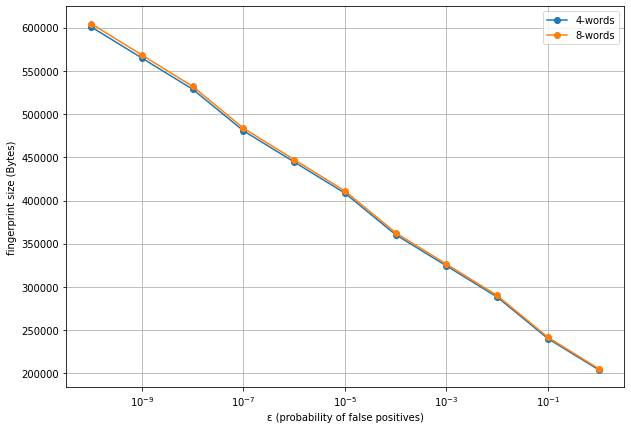

In [136]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.plot(epsilons, l4, marker="o", label="4-words")
plt.plot(epsilons, l8, marker="o", label="8-words")

plt.xscale("log")
plt.legend()
plt.grid()
plt.ylabel("fingerprint size (Bytes)")
plt.xlabel("ε (probability of false positives)")
plt.savefig("hash_bits.png")
plt.show()

In [149]:
l4 = []
l8 = []
epsilons = []
m4 = len(sentences4)
m8 = len(sentences8)

for epsilon in np.logspace(-10, 0, num=11):
    f4 = store_fingerprints(sentences4, epsilon)
    f8 = store_fingerprints(sentences8, epsilon)
    l4.append(asizeof.asizeof(f4))
    l8.append(asizeof.asizeof(f8))
    epsilons.append(epsilon)

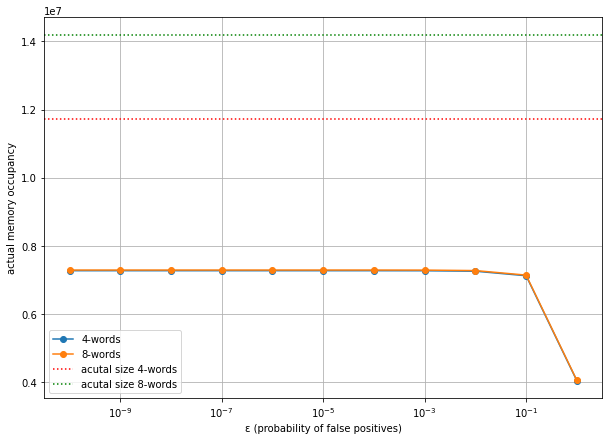

In [138]:
plt.figure(figsize=(10,7))

plt.plot(epsilons, l4, marker="o", label="4-words")
plt.plot(epsilons, l8, marker="o", label="8-words")
plt.axhline(asizeof.asizeof(sentences4), color="r", linestyle = ':', label="acutal size 4-words")
plt.axhline(asizeof.asizeof(sentences8), color="g", linestyle = ':', label="acutal size 8-words")

plt.xscale("log")
plt.grid()
plt.legend()
plt.xlabel("ε (probability of false positives)")
plt.ylabel("actual memory occupancy")
plt.savefig("memory_occupancy.png")
plt.show()

In [139]:
print("4-words")
print(f"Total number of sentences: {len(sentences4)}")
print(f"Experimental amount of stored data: {stored_data(sentences4)} B ({stored_data(sentences4) / 2**20} MB)")
print(f"Memory occupancy of the set of sentences: {asizeof.asizeof(sentences4)} B ({asizeof.asizeof(sentences4) / 2**20} MB)")

4-words
Total number of sentences: 96120
Experimental amount of stored data: 7516160 B (7.16796875 MB)
Memory occupancy of the set of sentences: 11710680 B (11.168174743652344 MB)


In [140]:
print("8-words")
print(f"Total number of sentences: {len(sentences8)}")
print(f"Experimental amount of stored data: {stored_data(sentences8)} B ({stored_data(sentences8) / 2**20} MB)")
print(f"Memory occupancy of the set of sentences: {asizeof.asizeof(sentences8)} B ({asizeof.asizeof(sentences8) / 2**20} MB)")

8-words
Total number of sentences: 96715
Experimental amount of stored data: 10001896 B (9.538551330566406 MB)
Memory occupancy of the set of sentences: 14196416 B (13.53875732421875 MB)


In [141]:
print("Experimental amount of stored data (independently from the data structure):")
print(f"\t{asizeof.asizeof(data)} B \n\t{asizeof.asizeof(data) / 2**20} MB" , )

Experimental amount of stored data (independently from the data structure):
	516864 B 
	0.492919921875 MB
